In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

### **Load Data**

In [9]:
# read every column except 'device_fraud_count' as its value is a constant 0
df = pd.read_csv('Base.csv', usecols=lambda x: x != 'device_fraud_count')

### **Handle Missing Values**

In [10]:
# Features with missing values represented by negative values according to documentation
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 
                    'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# Replace negative values with NaN
for feature in missing_features:
    df[feature] = df[feature].apply(lambda x: x if x >= 0 else np.nan)

### **Encode missing values**

In [11]:
features_to_drop = ['prev_address_months_count', 'intended_balcon_amount', 'bank_months_count']
for col in features_to_drop:
    missing_column_name = f'{col}_missing'
    df[missing_column_name] = np.where(df[col].isna(), 1, 0)

Drop features with a high percentage of missing values, and have very weak correlation with fraud status.

In [12]:
df.drop(features_to_drop, axis=1, inplace=True)

Drop rows with missing values as a very small percentage of the remaining observations have missing values.

In [13]:
df.dropna(inplace=True)

### **Handle Categorical Features**

Perform dummy encoding. Very similar to one-hot encoding, but the first encoded column is dropped to reduce correlation between encoded columns.

In [14]:
# Only features with String data type need to be encoded
encoded_features = [feature for feature in df.columns if df[feature].dtype == 'object']

df = pd.get_dummies(df, columns=encoded_features, drop_first=True, dtype=int)

### **Train-Test Split**

In [15]:
# Separate the feature matrix and target variable
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

### **Feature Scaling**

#### Min-Max Scaling (Normalization)

From EDA, numerical features were identified. Min-max scaling is applied as parametric models are sensitive to scale.

In [16]:
numeric_features = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 
                    'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'proposed_credit_limit', 'session_length_in_minutes']

scaler = MinMaxScaler()

# Fit only on the training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### **Feature Selection - Backward Stepwise (logistic model)**

In [17]:
# import statsmodels.api as sm

# def backward_stepwise_selection(X, y, p_threshold=0.05):
#     features = X.columns.tolist()
#     num_features = len(features)
    
#     for i in range(num_features, 0, -1):
#         model = sm.Logit(y, X[features]).fit()
#         p_values = model.pvalues
#         max_p_value = p_values.max()
#         if max_p_value > p_threshold:
#             remove_feature = p_values.idxmax()
#             print(f"Removing '{remove_feature}' with p-value: {max_p_value:.4f}")
#             features.remove(remove_feature)
#         else:
#             break
            
#     return features

# selected_features = backward_stepwise_selection(X_train, y_train)
# print("Selected Features:", selected_features) #35 features
# #['income', 'name_email_similarity', 'customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 
# # 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 
# # 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit',
# # 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month',
# # 'payment_type_AC', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
# # 'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF',
# # 'source_TELEAPP', 'device_os_macintosh', 'device_os_windows', 'device_os_x11']



In [18]:
# selected_features = ['income', 'name_email_similarity', 'customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 
# 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 
# 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit',
# 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month',
# 'payment_type_AC', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
# 'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF',
# 'source_TELEAPP', 'device_os_macintosh', 'device_os_windows', 'device_os_x11'] + ['prev_address_months_count_missing', 'intended_balcon_amount_missing', 'bank_months_count_missing']

# # X_train = X_train[selected_features]
# # X_test = X_test[selected_features]

In [19]:
# updated features
selected_features = ['income', 'name_email_similarity', 'customer_age', 
                     'zip_count_4w', 'velocity_6h', 'velocity_24h', 
                     'velocity_4w', 'bank_branch_count_8w', 
                     'date_of_birth_distinct_emails_4w', 'credit_risk_score', 
                     'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
                     'has_other_cards', 'proposed_credit_limit', 'foreign_request', 
                     'keep_alive_session', 'month', 'payment_type_AC', 'employment_status_CB', 
                     'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 
                     'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 
                     'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 
                     'source_TELEAPP', 'device_os_macintosh', 'device_os_windows', 
                     'device_os_x11', 'prev_address_months_count_missing', 
                     'intended_balcon_amount_missing']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### **Resampling**

Fraud class vs non fraud class 

In [20]:
ratio = y.value_counts() / len(y) * 100
print(f'% of non-fraud class in y: {round(ratio[0],3)}%\n% of fraud class in y: {round(ratio[1],3)}%\n')

ratio_train = y_train.value_counts() / len(y_train) * 100
print(f'% of non-fraud class in y_train: {round(ratio_train[0],3)}%\n% of fraud class in y_train: {round(ratio_train[1],3)}%\n')

ratio_test = y_test.value_counts() / len(y_test) * 100
print(f'% of non-fraud class in y_test: {round(ratio_test[0],3)}%\n% of fraud class in y_test: {round(ratio_test[1],3)}%')

% of non-fraud class in y: 98.893%
% of fraud class in y: 1.107%

% of non-fraud class in y_train: 98.893%
% of fraud class in y_train: 1.107%

% of non-fraud class in y_test: 98.893%
% of fraud class in y_test: 1.107%


SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy = 0.666) #ratio of minority:majority 40:60

Xt_resampled_SMOTE, yt_resampled_SMOTE = smote.fit_resample(X_train, y_train)

ratio_SMOTE = yt_resampled_SMOTE.value_counts() / len(yt_resampled_SMOTE) * 100
print(f'% of non-fraud class in resampled data: {round(ratio_SMOTE[0],3)}%\n% of fraud class in resampled data: {round(ratio_SMOTE[1],3)}%')

% of non-fraud class in resampled data: 60.024%
% of fraud class in resampled data: 39.976%


### **Evaluation metric**

In [22]:
metrics_names = ['Ratio of Classes', 'Accuracy', 'Recall','Precision', 'F2 Score', 'F1.5 Score','F1 Score', 
                 'TPR','FNR', "PR-AUC", 'Balanced Accuracy', 'Kappa Statistic']
results = pd.DataFrame(index= metrics_names,columns=['Original Dataset', 'SMOTE'])
class_reports = {}
pr_auc_pts = {}

results.loc['Ratio of Classes','Original Dataset'] = str(round(ratio_train,3)[0]) + '% : ' +str(round(ratio_train,3)[1])+'%'
results.loc['Ratio of Classes','SMOTE'] = str(round(ratio_SMOTE,3)[0]) + '% : ' +str(round(ratio_SMOTE,3)[1])+'%'

In [20]:
# from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, fbeta_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix,balanced_accuracy_score, cohen_kappa_score
# def evaluate_results(model,resampler,x_resampled, y_resampled):

#     model.fit(x_resampled, y_resampled)

#     y_pred_test = model.predict(X_test)

#     results.loc['Accuracy',resampler] = accuracy_score(y_test, y_pred_test)
#     class_reports[resampler] = classification_report(y_test, y_pred_test)
#     results.loc['Recall',resampler] = recall_score(y_test, y_pred_test)
#     results.loc['Precision',resampler] = precision_score(y_test, y_pred_test)
#     results.loc['F2 Score',resampler] = fbeta_score(y_test, y_pred_test, beta =2)
#     results.loc['F1.5 Score',resampler] = fbeta_score(y_test, y_pred_test, beta =1.5)
#     results.loc['F1 Score',resampler] = f1_score(y_test, y_pred_test)
#     results.loc['PR-AUC',resampler] = average_precision_score(y_test, y_pred_test)
#     pr_auc_pts[resampler] = precision_recall_curve(y_test, y_pred_test)
#     results.loc['Balanced Accuracy',resampler] = balanced_accuracy_score(y_test, y_pred_test)
#     results.loc['Kappa Statistic',resampler] = cohen_kappa_score(y_test, y_pred_test)
    
#     cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])
#     TN, FP, FN, TP = cm.ravel()
#     TPR = TP/(TP+FN)
#     FNR = FN/(TP+FN)
#     results.loc['TPR',resampler] = TPR
#     results.loc['FNR',resampler] = FNR

#     print(f"{resampler} Model Performance on Test Data:")
#     print(f"{resampler} Accuracy:", results.loc['Accuracy',resampler])
#     print(f"{resampler} Precision: {results.loc['Precision',resampler]}")
#     print(f"{resampler} Recall: {results.loc['Recall',resampler]}")
#     print(f"{resampler} F2: {results.loc['F2 Score',resampler]}")
#     print(f"{resampler} F1.5: {results.loc['F1.5 Score',resampler]}")
#     print(f"{resampler} F1: {results.loc['F1 Score',resampler]}")
#     print(f"{resampler} PR-AUC: {results.loc['PR-AUC',resampler]}")
#     print(f"{resampler} TPR: {results.loc['TPR',resampler]}")
#     print(f"{resampler} FNR: {results.loc['FNR',resampler]}")
#     print(f"{resampler} Balanced Accuracy: {results.loc['Balanced Accuracy',resampler]}")
#     print(f"{resampler} Kappa Statistic: {results.loc['Kappa Statistic',resampler]}")
#     print(f"{resampler} Classification Report: \n{class_reports[resampler]}")

In [23]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, fbeta_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix,balanced_accuracy_score, cohen_kappa_score
def evaluate_results(y_test, y_pred):
    score_results = {}
    score_results["accuracy_score"] = accuracy_score(y_test, y_pred)
    score_results["classification_report"] = classification_report(y_test, y_pred)
    score_results["recall_score"] = recall_score(y_test, y_pred)
    score_results["precision_score"] = precision_score(y_test, y_pred)
    score_results["F2-score"] = fbeta_score(y_test, y_pred, beta =2)
    score_results["F1-score"] = f1_score(y_test, y_pred)
    score_results["average_precision_score"] = average_precision_score(y_test, y_pred)
    score_results["PR-AUC"] = precision_recall_curve(y_test, y_pred)
    score_results["balanced_accuracy_score"] = balanced_accuracy_score(y_test, y_pred)
    score_results["Kappa statistics"] = cohen_kappa_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    TN, FP, FN, TP = cm.ravel()
    TPR = TP/(TP+FN)
    FNR = FN/(TP+FN)
    score_results["TPR"] = TPR
    score_results["FNR"] = FNR
    return score_results

'''
## To use function
xgb_base_pred = xgb_base.predict(X_test_new)

xgb_base_results = evaluate_results(y_test=y_test_new, y_pred=xgb_base_pred)
'''


'\n## To use function\nxgb_base_pred = xgb_base.predict(X_test_new)\n\nxgb_base_results = evaluate_results(y_test=y_test_new, y_pred=xgb_base_pred)\n'

In [24]:
import pickle

def save_model(model, model_filename):
    pickle.dump(model, open(model_filename,"wb"))

# This function is more spcific to the results from lazy classifier. feel free to overwrite it
def save_results(results_df, results_filename):
    results_df = results_df["evaluate_results"].reset_index()
    # Convert the 'Metrics' column into separate columns
    df_metrics = pd.json_normalize(results_df['evaluate_results'])

    # Concatenate the two DataFrames
    results_df = pd.concat([results_df['Model'].rename('Model'), df_metrics], axis=1)
    results_df.to_csv(results_filename, index=False)

def save_model_and_results(model, model_filename, results_df, results_filename):
    save_model(model, model_filename)
    save_results(results_df, results_filename)

'''
## Sample usage
save_model_and_results(clf_smote_encoded,"C:/NUS/Fraud-Hackathon/models/baseline_encoded.pkl", models_smote_encoded, "C:/NUS/Fraud-Hackathon/models/baseline_encoded_results.csv")
'''

'\n## Sample usage\nsave_model_and_results(clf_smote_encoded,"C:/NUS/Fraud-Hackathon/models/baseline_encoded.pkl", models_smote_encoded, "C:/NUS/Fraud-Hackathon/models/baseline_encoded_results.csv")\n'

### **Models**

#### AdaBoost

In [26]:
# without tuning
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(Xt_resampled_SMOTE, yt_resampled_SMOTE)
adaboost_pred = adaboost.predict(X_test)
ada_results = evaluate_results(y_test, adaboost_pred)
ada_results

c:\Users\User\anaconda3\envs\dsa4263\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy_score': 0.9379786837894144,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.99      0.94      0.97    196523\n           1       0.09      0.48      0.15      2199\n\n    accuracy                           0.94    198722\n   macro avg       0.54      0.71      0.56    198722\nweighted avg       0.98      0.94      0.96    198722\n',
 'recall_score': 0.4756707594361073,
 'precision_score': 0.08561139302668194,
 'F2-score': 0.24888169791567527,
 'F1-score': 0.14510647152666992,
 'average_precision_score': 0.046524911598302125,
 'PR-AUC': (array([0.01106571, 0.08561139, 1.        ]),
  array([1.        , 0.47567076, 0.        ]),
  array([0, 1], dtype=int64)),
 'balanced_accuracy_score': 0.709411225802227,
 'Kappa statistics': 0.12876581867168801,
 'TPR': 0.4756707594361073,
 'FNR': 0.5243292405638926}

In [13]:
print(ada_results['classification_report'])

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    196523
           1       0.09      0.48      0.15      2199

    accuracy                           0.94    198722
   macro avg       0.54      0.71      0.56    198722
weighted avg       0.98      0.94      0.96    198722



##### Tune Adaboost

In [27]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer

ada = AdaBoostClassifier(random_state=42, 
                         n_estimators=50, 
                         learning_rate=1.0, 
                         algorithm='SAMME.R')

smote = SMOTE(sampling_strategy = 0.666, random_state=42) #ratio of minority:majority 40:60
pipeline = make_pipeline(smote, ada)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_ada = {
    'adaboostclassifier__learning_rate': [0.001, 0.01, 0.1, 1],
    'adaboostclassifier__n_estimators' : [25, 50, 100, 200],
    # 'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']
}
f2_scorer = make_scorer(fbeta_score, beta=2)

ada_tune = HalvingGridSearchCV(estimator=pipeline,
                            param_grid=param_ada,
                            cv=cv,
                            n_jobs=-1,
                            random_state=42,
                            scoring = f2_scorer,
                            verbose=2)

ada_tune_train = ada_tune.fit(X_train, y_train)

import pickle
pickle.dump(ada_tune, open('ada_tune_pipeline.pkl','wb'))
pickle.dump(ada_tune_train, open('ada_tune_train_pipeline.pkl','wb'))

# ada_tune.cv_results_, ada_tune.best_params_, ada_tune.best_score_
print(f'CV Results: {ada_tune.cv_results_}')
print(f'Best parameters: {ada_tune.best_params_}')
print(f'Best Score: {ada_tune.best_score_}')

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 88320
max_resources_: 794885
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 88320
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 6
n_resources: 264960
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 794880
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\User\anaconda3\envs\dsa4263\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Results: {'iter': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 2]), 'n_resources': array([ 88320,  88320,  88320,  88320,  88320,  88320,  88320,  88320,
        88320,  88320,  88320,  88320,  88320,  88320,  88320,  88320,
       264960, 264960, 264960, 264960, 264960, 264960, 794880, 794880]), 'mean_fit_time': array([ 13.556599  ,  26.10086598,  55.5783154 , 126.84125729,
        16.4772531 ,  33.20272679,  67.17661357, 131.64660969,
        18.24864426,  37.14128652,  59.31608024, 111.96014886,
        14.64974298,  28.24164906,  56.32459803,  90.92751551,
       196.7778141 , 398.89205589, 401.22199583,  53.63603668,
       182.139745  ,  79.75948324, 431.28253202, 584.49625034]), 'std_fit_time': array([6.88420449e-01, 1.27801033e+00, 2.89205587e+00, 5.34333164e+00,
       5.61044643e-01, 2.75529492e+00, 1.21655073e+00, 2.55355384e+00,
       1.65621594e+00, 7.65745068e-01, 1.87519317e+00, 7.50697106e-01,
       7.24304580e-02, 5.66549715e-

In [28]:
ada_tune_pred = ada_tune.predict(X_test)
ada_tuned_results = evaluate_results(y_test, ada_tune_pred)
ada_tuned_results

{'accuracy_score': 0.9566177876631676,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.99      0.96      0.98    196523\n           1       0.11      0.40      0.17      2199\n\n    accuracy                           0.96    198722\n   macro avg       0.55      0.68      0.57    198722\nweighted avg       0.98      0.96      0.97    198722\n',
 'recall_score': 0.4038199181446112,
 'precision_score': 0.10831910222005367,
 'F2-score': 0.26126868306461104,
 'F1-score': 0.1708185053380783,
 'average_precision_score': 0.050338566817726235,
 'PR-AUC': (array([0.01106571, 0.1083191 , 1.        ]),
  array([1.        , 0.40381992, 0.        ]),
  array([0, 1], dtype=int64)),
 'balanced_accuracy_score': 0.6833116270704535,
 'Kappa statistics': 0.15609184295996137,
 'TPR': 0.4038199181446112,
 'FNR': 0.5961800818553888}

In [29]:
print(ada_tuned_results['classification_report'])

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    196523
           1       0.11      0.40      0.17      2199

    accuracy                           0.96    198722
   macro avg       0.55      0.68      0.57    198722
weighted avg       0.98      0.96      0.97    198722



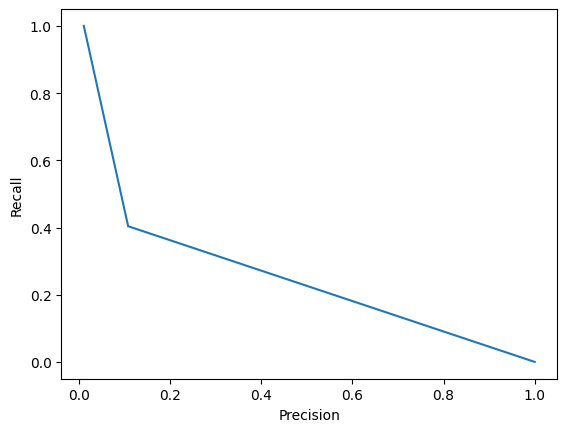

In [84]:
# plot precision-recall
import matplotlib.pyplot as plt
p = ada_tuned_results['PR-AUC'][0]
r = ada_tuned_results['PR-AUC'][1]
plt.plot(p,r)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [15]:
# calculate uplift for metrics after tuning
for k,v in ada_tuned_results.items():
    if k in ['classification_report', 'PR-AUC']:
        continue
    print(f'{k} uplift = {(v - ada_results[k])*100:.3f}%')

accuracy_score uplift = 1.864%
recall_score uplift = -7.185%
precision_score uplift = 2.271%
F2-score uplift = 1.239%
F1-score uplift = 2.571%
average_precision_score uplift = 0.381%
balanced_accuracy_score uplift = -2.610%
Kappa statistics uplift = 2.733%
TPR uplift = -7.185%
FNR uplift = 7.185%


<Axes: title={'center': 'Feature Importance in AdaBoost'}, xlabel='Feature Importance', ylabel='Features'>

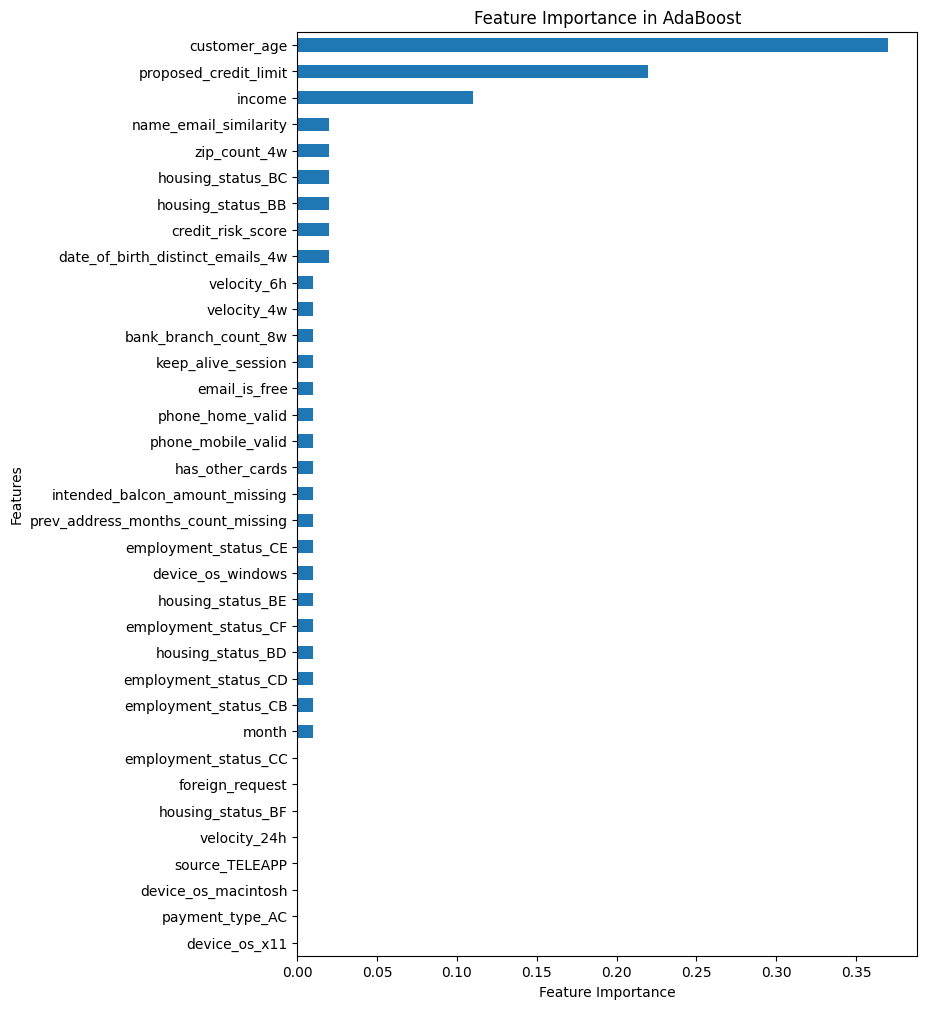

In [70]:
feat_importance = ada_tune_train.best_estimator_.named_steps['adaboostclassifier'].feature_importances_
feat_names = ada_tune_train.best_estimator_.named_steps['adaboostclassifier'].feature_names_in_

feat_importances_series = pd.Series(feat_importance, index=feat_names).sort_values()
feat_importances_series.plot(kind='barh', figsize=(8,12),  
                             title='Feature Importance in AdaBoost', 
                             xlabel='Feature Importance', ylabel='Features')